# Lab 1 (Pandas Tutorial)

## Task2: Using the pandas Python Library

### 2.1) Create a download script to download data



In [1]:
import requests
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
#save the file nba_all_elo.csv in your current working directory
response.raise_for_status()#check that the request was successful

with open(target_csv_path, "wb") as f:
    f.write(response.content)

print("Download ready")

Download ready


### 2.2) Use pandas to look at the data

In [2]:
import pandas as pd

nba = pd.read_csv(target_csv_path)

### 2.3) See how much data is in nba

In [3]:
# Set you can see everything with a scroll bar
pd.set_option("Display.max.columns", None)

# Precision of Pandas to only decimal places
pd.set_option("display.precision", 2)


#### Question 1, display the first 3 rows


In [4]:
nba.head(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN


## Task3: Get to Know Your Data
### 3.1) Discover the different types of your dataset

#### Question 2
Observations about the columns team_id and fran_id

-> Fran_id should be smaller than team_id, what's happening here?

### 3.3) Exploring the dataset

#### Question 3

Find out how many wins and losses the Minneapolis Lakes had and ...

In [5]:
nba.loc[nba["team_id"] == "MNL", "game_result"].value_counts()

W    524
L    422
Name: game_result, dtype: int64

... how many points they scored during those games

In [6]:
nba.loc[nba["team_id"] == "MNL", "pts"].sum()

88229

#### Question 4 
How many points did the Boston Celtics have scored during all matches contained in this dataset

In [7]:
nba.loc[nba["team_id"] == "BOS", "pts"].sum()

626484

#### Question 5
Explain the answer to Question 2 in a structured way:

A francise has more than 1 team, therefore there is no error

### Task 4 Data Access methods
Using .loc, .iloc to get a subset of dataframe

#### Question 6 
6.1) Display the 4th row from the bottom of the nba dataset

In [8]:
nba.iloc[-4]

gameorder               63156
game_id          201506140GSW
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/14/2015
seasongame                102
is_playoffs                 1
team_id                   GSW
fran_id              Warriors
pts                       104
elo_i                 1809.98
elo_n                 1813.63
win_equiv               68.01
opp_id                    CLE
opp_fran            Cavaliers
opp_pts                    91
opp_elo_i             1704.39
opp_elo_n             1700.74
game_location               H
game_result                 W
forecast                 0.77
notes                     NaN
Name: 126310, dtype: object

6.2) Use a data access method to display the 2nd row from the top of the nba dataset.

In [9]:
nba.iloc[2]

gameorder                   2
game_id          194611020CHS
lg_id                     NBA
_iscopy                     0
year_id                  1947
date_game           11/2/1946
seasongame                  1
is_playoffs                 0
team_id                   CHS
fran_id                 Stags
pts                        63
elo_i                  1300.0
elo_n                 1309.65
win_equiv               42.01
opp_id                    NYK
opp_fran               Knicks
opp_pts                    47
opp_elo_i             1306.72
opp_elo_n             1297.07
game_location               H
game_result                 W
forecast                 0.63
notes                     NaN
Name: 2, dtype: object

6.3) Access all games between the labels 5555 and 5559; you only want to see the names of teams and the scores.

In [10]:
nba.iloc[5555:5559][["team_id","opp_id","pts", "opp_pts"]]

,team_id,opp_id,pts,opp_pts
5555,FTW,PHW,83,56
5556,BOS,NYK,95,74
5557,NYK,BOS,74,95
5558,ROC,SYR,81,86


## Task 5: Querying the Dataset
#### Question 7
Create a new DataFrame that consists of the games played between 2000 and 2009

In [11]:
temp = nba[nba["year_id"] <= 2009]
last_decade = temp[temp["year_id"] >= 2000]
del(temp)


#### Question.8 (report your answer): 
Filter your dataset and find all the playoffs games where the number of points scored by both home and away was more than 100 in 2011 and make sure you do not include duplicates (do not forget the parentheses).

In [12]:
nba[(nba["_iscopy"] == 0) & (nba["pts"] > 100) & (nba["opp_pts"] > 100) & (nba["year_id"] == 2011)]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
113659,56830,201010260LAL,NBA,0,2011,10/26/2010,1,0,LAL,Lakers,112,1647.60,1649.20,55.61,HOU,Rockets,110,1504.20,1502.60,H,W,0.80,NaN
113668,56835,201010270GSW,NBA,0,2011,10/27/2010,1,0,GSW,Warriors,132,1432.78,1438.42,34.23,HOU,Rockets,128,1502.60,1496.96,H,W,0.54,NaN
113673,56837,201010270MEM,NBA,0,2011,10/27/2010,1,0,MEM,Grizzlies,104,1463.67,1450.23,35.44,ATL,Hawks,119,1564.23,1577.66,H,L,0.50,NaN
113674,56838,201010270MIN,NBA,0,2011,10/27/2010,1,0,MIN,Timberwolves,116,1307.70,1302.87,21.62,SAC,Kings,117,1356.56,1361.40,H,L,0.57,NaN
113684,56843,201010270SAS,NBA,0,2011,10/27/2010,1,0,SAS,Spurs,122,1594.28,1599.31,50.85,IND,Pacers,109,1492.38,1487.35,H,W,0.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116213,58107,201105030OKC,NBA,0,2011,5/3/2011,89,1,OKC,Thunder,111,1659.01,1664.65,57.00,MEM,Grizzlies,102,1628.13,1622.49,H,W,0.68,NaN
116233,58117,201105090MEM,NBA,0,2011,5/9/2011,92,1,MEM,Grizzlies,123,1629.74,1616.46,52.53,OKC,Thunder,133,1657.41,1670.68,H,L,0.60,NaN
116248,58125,201105170DAL,NBA,0,2011,5/17/2011,93,1,DAL,Mavericks,121,1698.00,1703.92,60.35,OKC,Thunder,112,1677.60,1671.68,H,W,0.67,NaN
116258,58130,201105230OKC,NBA,0,2011,5/23/2011,98,1,OKC,Thunder,105,1672.98,1662.28,56.79,DAL,Mavericks,112,1702.62,1713.31,H,L,0.60,NaN


## Task 6: Grouping and Aggregating your Data

#### Question.9 (report your answer):
Take a look at the New York Knicks 2011-12 season (year_id: 2012). How many wins and losses did they score during the regular season and the playoffs?

In [13]:
# 1. filter NYK, 2012 season
# 2. groupby is_playoffs
# 3. show count of wins and losses
nba[(nba["team_id"] == "NYK") & (nba["year_id"] == 2012)].groupby("is_playoffs")["game_result"].value_counts()

is_playoffs  game_result
0            W              36
             L              30
1            L               4
             W               1
Name: game_result, dtype: int64

## Task 7: Manipulating Columns
No questions

## Task 8: Specify Data Types
#### Question.10 (report your answer): 
Find another column in the nba dataset with a generic data type and convert it to a more specific one.

In [14]:
df = nba.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [15]:
df["game_result"].nunique()

2

In [16]:
df["game_result"] = pd.Categorical(df["game_result"]) # Change Game result to catecorical values

df["game_result"].head()

0    L
1    W
2    W
3    L
4    L
Name: game_result, dtype: category
Categories (2, object): ['L', 'W']

## Task 9: Cleaning the Data
No questions
## Task 10: Data Visualisation
No questions




<AxesSubplot:xlabel='year_id'>

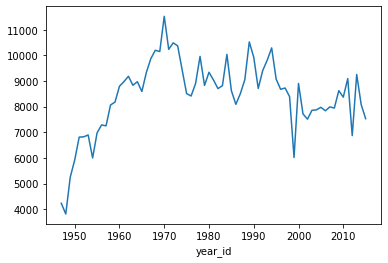

In [17]:
#include this line to show plots directly in the notebook
%matplotlib inline

#visualise how many points the Knicks scored throughout the seasons
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()




<AxesSubplot:>

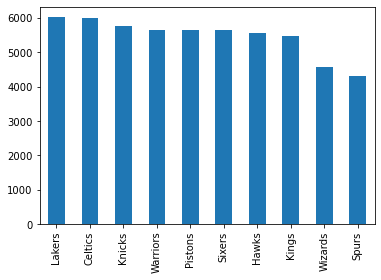

In [18]:
#create a bar plot to show the franchises with the most games played
nba["fran_id"].value_counts().head(10).plot(kind="bar")

#### Question.11 (report your answer):
11.1)	Explain what the above line plot, showing how many points the Knicks scored throughout the seasons, reveals to you (i.e. describe what you find out).


#### Answer:
The lineplot shows me that the sum of points fluctuate between 4000 and 12000

From 1950-1970 there has been a steady increase, while after 1970 the trend has been a slow decrease. 

Between the years the Scores still fluctuate by as much as 2000 points

11.2)	Describe what the above bar plot reveals about the franchises with the most games played.


#### Answer:
The first 8 franchises all have a similar amount of games played. Then it drops off with "Wizards" and "Spurs"

11.3)	In 2013, the Miami Heat won the championship. Create a pie plot showing the count of their wins and losses during that season. (First, define a criterion to include only the Heat's games from 2013. Then, create a plot in the same way as you have seen above). 

<AxesSubplot:ylabel='game_result'>

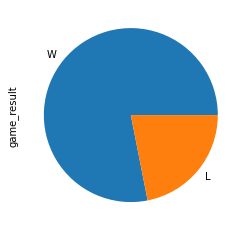

In [19]:
data = nba[(nba["team_id"] == "MIA") & (nba["year_id"] == 2013)]

data["game_result"].value_counts().plot(kind="pie")